<a href="https://colab.research.google.com/github/ameralhomdy/DS-Unit-1-Sprint-3-Statistical-Tests-and-Experiments/blob/master/module3-introduction-to-bayesian-inference/LS_DS_133_Introduction_to_Bayesian_Inference_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science Module 133

## Introduction to Bayesian Inference




## Assignment - Code it up!

Most of the above was pure math - now write Python code to reproduce the results! This is purposefully open ended - you'll have to think about how you should represent probabilities and events. You can and should look things up, and as a stretch goal - refactor your code into helpful reusable functions!

Specific goals/targets:

1. Write a function `def prob_drunk_given_positive(prob_drunk_prior, prob_positive, prob_positive_drunk)` that reproduces the example from lecture, and use it to calculate and visualize a range of situations
2. Explore `scipy.stats.bayes_mvs` - read its documentation, and experiment with it on data you've tested in other ways earlier this week
3. Create a visualization comparing the results of a Bayesian approach to a traditional/frequentist approach
4. In your own words, summarize the difference between Bayesian and Frequentist statistics

If you're unsure where to start, check out [this blog post of Bayes theorem with Python](https://dataconomy.com/2015/02/introduction-to-bayes-theorem-with-python/) - you could and should create something similar!

Stretch goals:

- Apply a Bayesian technique to a problem you previously worked (in an assignment or project work) on from a frequentist (standard) perspective
- Check out [PyMC3](https://docs.pymc.io/) (note this goes beyond hypothesis tests into modeling) - read the guides and work through some examples
- Take PyMC3 further - see if you can build something with it!

In [0]:
# TODO - code!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

def prob_drunk_given_positive(prob_drunk_prior, prob_positive, prob_positive_drunk):
  return (prob_positive_drunk * prob_drunk_prior) / prob_positive

In [2]:
prob_drunk_given_positive(0.001, 0.08, 1)

0.0125

In [3]:
# this is for the drug example in the lecture
prob_drunk_given_positive(0.005, ((0.005*0.99) + (0.995*0.01)), 0.99)

0.33221476510067116

In [0]:
# for x in range (1, 1000):
#   drunk_plot = prob_drunk_given_positive(x/1000, 0.08, 1)

In [5]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data',
                 header=None,
                 names=['party','handicapped-infants','water-project',
                          'budget','physician-fee-freeze', 'el-salvador-aid',
                          'religious-groups','anti-satellite-ban',
                          'aid-to-contras','mx-missile','immigration',
                          'synfuels', 'education', 'right-to-sue','crime','duty-free',
                          'south-africa'])
df.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [0]:
df = df.replace({'?': np.NaN, 'y': 1, 'n': 0})

In [0]:
dem = df[df['party'] == 'democrat']
rep = df[df['party'] == 'republican']

In [0]:
# Let's take one column and use both bayesian and frequentist approach
dem_handicapped_infants = dem['handicapped-infants'].dropna().astype(int)


In [0]:
def confidence_interval(data, confidence=0.95):
  data = np.array(data)
  mean = np.mean(data)
  n = len(data)
  # stderr = stats.sem(data)
  stderr = np.std(data, ddof=1) / np.sqrt(n)
  margin_of_error = stderr * stats.t.ppf((1 + confidence) / 2.0, n - 1)
  print(margin_of_error)
  return (mean, mean - margin_of_error, mean + margin_of_error)
  
frequentist = confidence_interval(dem_handicapped_infants)
frequentist

0.060058463048146146


(0.6046511627906976, 0.5445926997425515, 0.6647096258388437)

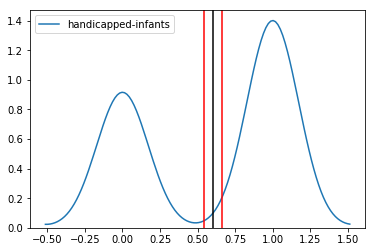

In [13]:
sns.kdeplot(dem_handicapped_infants)
plt.axvline(x=frequentist[1], color='red')
plt.axvline(x=frequentist[2], color='red')
plt.axvline(x=frequentist[0], color='k');

In [10]:
bayesmean, bayesvar, bayesstd = stats.bayes_mvs(dem_handicapped_infants)
bayesmean 

Mean(statistic=0.6046511627906976, minmax=(0.5543043832674934, 0.6549979423139018))

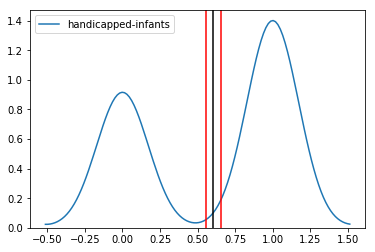

In [12]:
sns.kdeplot(dem_handicapped_infants)
plt.axvline(x=[0.5543043832674934], color='red')
plt.axvline(x=[0.6549979423139018], color='red')
plt.axvline(x=[0.6046511627906976], color='k');

## Resources

- [Worked example of Bayes rule calculation](https://en.wikipedia.org/wiki/Bayes'_theorem#Examples) (helpful as it fully breaks out the denominator)
- [Source code for mvsdist in scipy](https://github.com/scipy/scipy/blob/90534919e139d2a81c24bf08341734ff41a3db12/scipy/stats/morestats.py#L139)